#**Photovoltaic panel segmentation on building facades**

Ayca Duran*, Pedram Mirabian, Panagiotis Karapiperis, Christoph Waibel,
Bernd Bickel and Arno Schlueter

## Pre-processing of images

Following the data collection phase, the images were manually inspected and cropped in some cases to remove non-essential environment features.

Manual labeling was performed to determine the ground truth PV masks on the building facades and creating the dataset.

The cleaned and labeled images were then split into training, validation and test sets using a stratified sampling approach (detailed below) utilizing the metadata of the PV projects to ensure a representative distribution in the model training process.

The training dataset was then augmented by the following methods to increase the dataset size to 7x the original:

* Flip
* Crop (0% ... 40% zoom)
* Saturation (-20% ... +20%)
* Brightness (-20% ... +20%)
* Exposure (-20% ... +20%)

The labeling and augmentation step was performed using https://roboflow.com/

## Stratified Sampling

This notebook details the stratified sampling approach for this project. The results are exported in the *splits_counts.xlsx* file where for each project (unique building with PV on the facade), the split is determined to be training, validation, or test. These images were then automatically assigned to the respective folders as seen in the datasets of the MaskRCNN and SegFormer training sections.

In [ ]:
#libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
import pandas as pd


In [ ]:
from pathlib import Path

from google.colab import drive
drive.mount('/content/drive')

#Change the path as needed
base_path = Path("/content/drive/MyDrive/DLforPVFacades/paper/FinalCode/01_Pre-processing")

os.chdir(os.path.join(base_path, "PVFinderPaper_v1_labeled_dataset"))
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
try:
  df_kai = pd.read_excel(os.path.join(base_path,'Kai_full.xlsx'))
  df_pvfinder = pd.read_csv(os.path.join(base_path, Path('PVFinderPaper_v1_labeled_dataset/aggregated_image_info.csv')))
except FileNotFoundError:
  print("Error: file not found in the specified directory.")
except Exception as e:
  print(f"An error occurred: {e}")

In [ ]:
df_pvfinder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   project_id   264 non-null    int64  
 1   total        264 non-null    int64  
 2   gsv          264 non-null    int64  
 3   gsv_indexes  133 non-null    float64
 4   web          264 non-null    int64  
 5   web_indexes  218 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 12.5+ KB


In [ ]:
df_pvfinder = df_pvfinder.rename(columns={"project_id": "project index"})
df_pvfinder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   project index  264 non-null    int64  
 1   total          264 non-null    int64  
 2   gsv            264 non-null    int64  
 3   gsv_indexes    133 non-null    float64
 4   web            264 non-null    int64  
 5   web_indexes    218 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 12.5+ KB


In [ ]:
df_kai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   project index          588 non-null    int64 
 1   unique                 588 non-null    int64 
 2   source                 588 non-null    object
 3   sources                406 non-null    object
 4   project name           588 non-null    object
 5   affiliation            588 non-null    object
 6   coordinates            587 non-null    object
 7   notes                  588 non-null    object
 8   country                588 non-null    object
 9   address                588 non-null    object
 10  plant year             588 non-null    object
 11  project type           588 non-null    object
 12  project function       588 non-null    object
 13  pv system              588 non-null    object
 14  module type            588 non-null    object
 15  cell type              

In [ ]:
df_kai = df_kai[df_kai["unique"] != 0]
df_kai.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406 entries, 0 to 587
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   project index          406 non-null    int64 
 1   unique                 406 non-null    int64 
 2   source                 406 non-null    object
 3   sources                305 non-null    object
 4   project name           406 non-null    object
 5   affiliation            406 non-null    object
 6   coordinates            405 non-null    object
 7   notes                  406 non-null    object
 8   country                406 non-null    object
 9   address                406 non-null    object
 10  plant year             406 non-null    object
 11  project type           406 non-null    object
 12  project function       406 non-null    object
 13  pv system              406 non-null    object
 14  module type            406 non-null    object
 15  cell type              405 n

In [ ]:
merged_df = pd.merge(df_pvfinder, df_kai, on='project index', how='inner')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   project index          264 non-null    int64  
 1   total                  264 non-null    int64  
 2   gsv                    264 non-null    int64  
 3   gsv_indexes            133 non-null    float64
 4   web                    264 non-null    int64  
 5   web_indexes            218 non-null    object 
 6   unique                 264 non-null    int64  
 7   source                 264 non-null    object 
 8   sources                190 non-null    object 
 9   project name           264 non-null    object 
 10  affiliation            264 non-null    object 
 11  coordinates            264 non-null    object 
 12  notes                  264 non-null    object 
 13  country                264 non-null    object 
 14  address                264 non-null    object 
 15  plant 

IndexError: index 39 is out of bounds for axis 0 with size 39

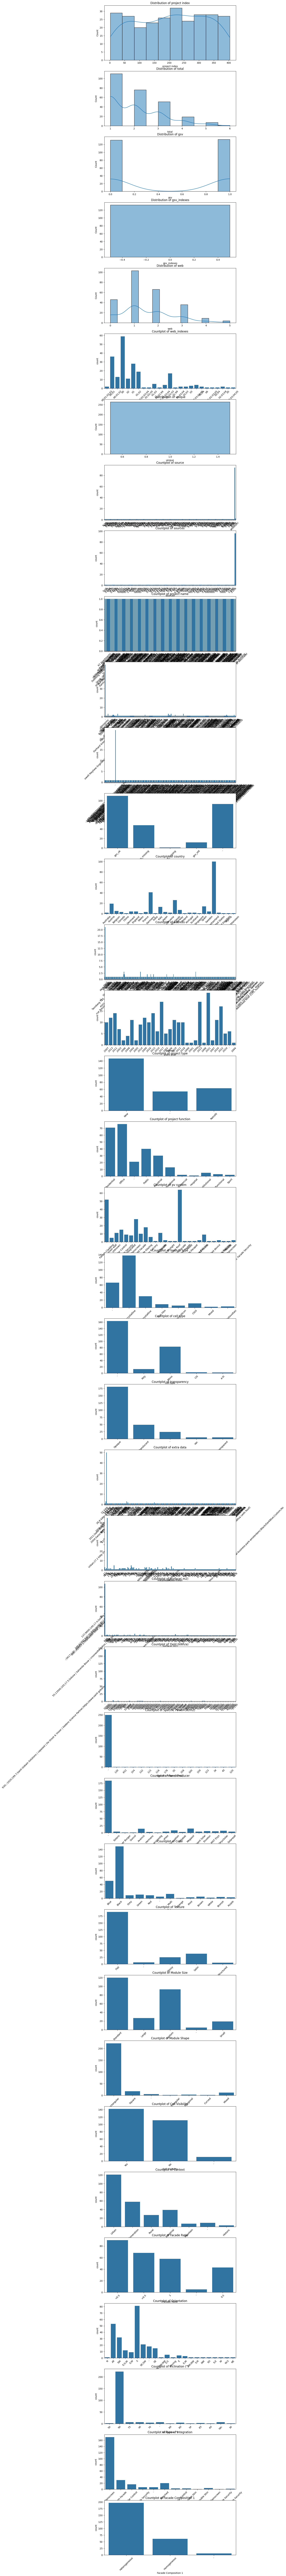

In [ ]:
def analyze_dataframe(df):
    num_cols = len(df.columns)
    num_rows = 0
    for col in df.columns:
        if df[col].dtype == 'object':
            num_rows +=1

    fig, axes = plt.subplots(num_rows, 1, figsize=(10, 5*num_rows)) # Adjust figsize as needed

    row_index = 0

    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            # Numerical data: histogram or distribution plot
            sns.histplot(df[col], kde=True, ax=axes[row_index])
            axes[row_index].set_title(f'Distribution of {col}')
            row_index +=1
        elif df[col].dtype == 'object':
            # Non-numerical data: unique values
            unique_values = df[col].unique()
            #print(f"Unique values for '{col}': {unique_values}")
            #Histogram for categorical features
            sns.countplot(x=col, data=df, ax=axes[row_index])
            axes[row_index].set_title(f'Countplot of {col}')
            axes[row_index].tick_params(axis='x', rotation=45)
            row_index += 1
        else:
            print(f"Skipping column '{col}' due to unsupported data type.")

    plt.tight_layout()
    plt.show()

analyze_dataframe(merged_df)

In [ ]:
merged_df.columns

Index(['project index', 'total', 'gsv', 'gsv_indexes', 'web', 'web_indexes',
       'unique', 'source', 'sources', 'project name', 'affiliation',
       'coordinates', 'notes', 'country', 'address', 'plant year',
       'project type', 'project function', 'pv system', 'module type',
       'cell type', 'transparency', 'extra data', 'Installed Power(kWp)',
       'Surface( m2)', 'Yield (kWh/a)', 'Specific Power (W/m2)',
       'Panel Producer', 'Color', 'Texture', 'Module Size', 'Module Shape',
       'Cell Visibility', 'Context', 'Facade Ratio', 'Orientation',
       'Inclination (°)', 'Type of Integration', 'Facade Composition 1',
       'Facade Composition 2', 'Concept', 'Module Orientation',
       'Ornamentation', 'Save???', 'Catalogue'],
      dtype='object')

In [ ]:
merged_df = merged_df.rename(columns={"total": "total_count", "gsv": "GSV_count", "web": "Web_count",
                                      "gsv_indexes": "GSV_items", "web_indexes": "Web_items"})

In [ ]:
df = merged_df[['project index', 'total_count', 'GSV_count', 'GSV_items', 'Web_count',
       'Web_items', 'Facade Composition 1', 'Facade Composition 2', 'Color', 'Texture',
       'Module Size', 'transparency', 'Module Shape', 'Cell Visibility', 'Facade Ratio', 'Type of Integration']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   project index         264 non-null    int64  
 1   total_count           264 non-null    int64  
 2   GSV_count             264 non-null    int64  
 3   GSV_items             133 non-null    float64
 4   Web_count             264 non-null    int64  
 5   Web_items             218 non-null    object 
 6   Facade Composition 1  264 non-null    object 
 7   Facade Composition 2  264 non-null    object 
 8   Color                 264 non-null    object 
 9   Texture               264 non-null    object 
 10  Module Size           264 non-null    object 
 11  transparency          264 non-null    object 
 12  Module Shape          264 non-null    object 
 13  Cell Visibility       264 non-null    object 
 14  Facade Ratio          264 non-null    object 
 15  Type of Integration   2

In [ ]:
df.to_excel("merged_data.xlsx", index=False)

In [ ]:
def analyze_dataframe(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            unique_counts = df[col].value_counts()
            print(f"Unique values and counts for '{col}':\n{unique_counts}\n")

analyze_dataframe(df)

Unique values and counts for 'Web_items':
Web_items
00                59
00;01             36
01                28
01;02             19
01;02;03          17
00;01;02          13
02                11
01;03              5
01;02;03;04        4
01;02;03;04;05     4
03                 3
00;01;02;03        2
02;03              2
02;03;04           2
01;03;04           2
01;04              2
00;02;03;04        1
01;02;05           1
01;02;99           1
01;99              1
06                 1
01;02;03;05        1
02;04              1
05                 1
02;03;04;05        1
Name: count, dtype: int64

Unique values and counts for 'Facade Composition 1':
Facade Composition 1
Heterogeneous    197
Homogeneous       61
-                  6
Name: count, dtype: int64

Unique values and counts for 'Facade Composition 2':
Facade Composition 2
Grid          66
Rhythmic      49
Banner        42
Flat          34
Depth         27
-             14
HighTech       8
Sculptural     7
VertZigZag     5
ZigZa

In [ ]:

def describe_numerical_data(df):
    """Prints distribution descriptors for numerical columns in a DataFrame."""
    numerical_cols = df.select_dtypes(include=['number'])
    if not numerical_cols.empty:
        print(numerical_cols.describe())
    else:
        print("No numerical columns found in the DataFrame.")

describe_numerical_data(df)

       project index  total_count   GSV_count  GSV_items   Web_count
count     264.000000   264.000000  264.000000      133.0  264.000000
mean      205.810606     2.015152    0.503788        0.0    1.511364
std       118.171888     1.096034    0.500935        0.0    1.123489
min         2.000000     1.000000    0.000000        0.0    0.000000
25%       101.250000     1.000000    0.000000        0.0    1.000000
50%       210.500000     2.000000    1.000000        0.0    1.000000
75%       307.250000     3.000000    1.000000        0.0    2.000000
max       404.000000     6.000000    1.000000        0.0    5.000000


In [ ]:
def merge_rare_categories(col, threshold=5):
    """
    Merges categories with < `threshold` occurrences into 'Other'.
    """
    counts = col.value_counts()
    rare = counts[counts < threshold].index
    return col.apply(lambda x: 'Other' if x in rare else x)


In [ ]:
def most_frequent(series):
    return series.value_counts().index[0]

project_group = df.groupby('project index').agg({
    'Facade Composition 2': most_frequent,   # or any other categorical col
    'Color': most_frequent,
    'Facade Ratio': most_frequent,
    'Cell Visibility': most_frequent,
    'GSV_count': 'sum',      # total GSV images in this project
    'Web_count': 'sum',      # total Web images in this project
    # Add more columns as needed
}).reset_index()



In [ ]:

def bin_count(x):
    if x == 0:
        return 'none'
    elif x <= 2:
        return 'low'
    else:
        return 'high'

project_group['GSV_bin'] = project_group['GSV_count'].apply(bin_count)
project_group['Web_bin'] = project_group['Web_count'].apply(bin_count)


In [ ]:
project_group['FacadeComp2_clean'] = merge_rare_categories(project_group['Facade Composition 2'])
project_group['Color_clean']       = merge_rare_categories(project_group['Color'])
project_group['FacadeRatio_clean'] = project_group['Facade Ratio']  # or merge rare if needed
project_group['CellVisibility_clean'] = merge_rare_categories(project_group['Cell Visibility'])

# Combine them, plus GSV_bin and Web_bin, into one string
project_group['stratify_label'] = (
    project_group['FacadeComp2_clean'].astype(str) + '_' +
    project_group['Color_clean'].astype(str) + '_' +
    project_group['FacadeRatio_clean'].astype(str) + '_' +
    project_group['CellVisibility_clean'].astype(str) + '_' +
    project_group['GSV_bin'].astype(str) + '_' +
    project_group['Web_bin'].astype(str)
)


In [ ]:

# =========================
# Step 0: Handle rare categories
# =========================
# Count occurrences in the entire dataset
counts = project_group['stratify_label'].value_counts()

# Identify labels that appear fewer than 2 times
rare_labels = counts[counts < 2].index

# Merge any rare categories into "Other"
project_group.loc[
    project_group['stratify_label'].isin(rare_labels),
    'stratify_label'
] = 'Other'

# Check final distribution
print("Final counts after merging rare categories:")
print(project_group['stratify_label'].value_counts())

# =========================
# Step 1: Split into train (80%) and val_test (20%)
# =========================
train_projects, val_test_projects = train_test_split(
    project_group,
    test_size=0.2,  # 20% for validation and test
    stratify=project_group['stratify_label'],
    random_state=8
)

# =========================
# Step 2: Merge rare categories in val_test_projects
# =========================
# Count occurrences in val_test_projects
counts_val_test = val_test_projects['stratify_label'].value_counts()

# Identify labels that appear fewer than 2 times
rare_labels_val_test = counts_val_test[counts_val_test < 2].index

# Merge any rare categories into "Other"
val_test_projects.loc[
    val_test_projects['stratify_label'].isin(rare_labels_val_test),
    'stratify_label'
] = 'Other'

# Check final distribution in val_test_projects
print("Final counts in val_test_projects after merging rare categories:")
print(val_test_projects['stratify_label'].value_counts())

# =========================
# Step 3: Split val_test into val (10%) and test (10%)
# =========================
val_projects, test_projects = train_test_split(
    val_test_projects,
    test_size=0.5,  # Split the 20% into 10% val and 10% test
    stratify=val_test_projects['stratify_label'],
    random_state=8
)

print("Train:", len(train_projects), "Val:", len(val_projects), "Test:", len(test_projects))

# =========================
# Step 4: Map back to original df
# =========================
train_projects['split'] = 'train'
val_projects['split']   = 'val'
test_projects['split']  = 'test'

split_df = pd.concat([train_projects, val_projects, test_projects], ignore_index=True)

# Merge the 'split' info back to the original df
df = df.merge(split_df[['project index', 'split']], on='project index', how='left')

# Then create final subsets
train_df = df[df['split'] == 'train'].copy()
val_df   = df[df['split'] == 'val'].copy()
test_df  = df[df['split'] == 'test'].copy()


Final counts after merging rare categories:
stratify_label
Other                               174
Rhythmic_Black_<0.5_No_none_low       5
Grid_Blue_>0.5_Yes_low_none           5
Flat_Black_1_Yes_none_low             4
Rhythmic_Black_0.5_Yes_none_low       4
Depth_Black_<0.5_Yes_none_low         3
Rhythmic_Multi_>0.5_No_none_low       3
Grid_Blue_<0.5_Yes_low_low            3
Grid_Blue_>0.5_Yes_none_low           3
Rhythmic_Black_<0.5_Yes_none_low      3
Grid_Blue_1_Yes_low_none              3
Rhythmic_Black_<0.5_Yes_low_none      3
Banner_Blue_>0.5_Yes_low_none         3
-_-_-_-_none_low                      3
Banner_Black_<0.5_No_none_low         3
Banner_Black_<0.5_Yes_low_low         3
Grid_Black_1_Yes_low_low              3
Flat_Blue_<0.5_Yes_low_low            2
Flat_Blue_<0.5_Yes_none_low           2
Other_Black_>0.5_Yes_low_none         2
Depth_Black_0.5_Yes_low_low           2
Grid_Black_1_Yes_none_low             2
Grid_Black_<0.5_Yes_none_low          2
Grid_Black_>0.5_Yes_n

/tmp/ipython-input-67-2488381961.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-67-2488381961.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-67-2488381961.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-67-2488381961.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-67-2488381961.py:40: UserWarning: set

ValueError: cannot insert split, already exists

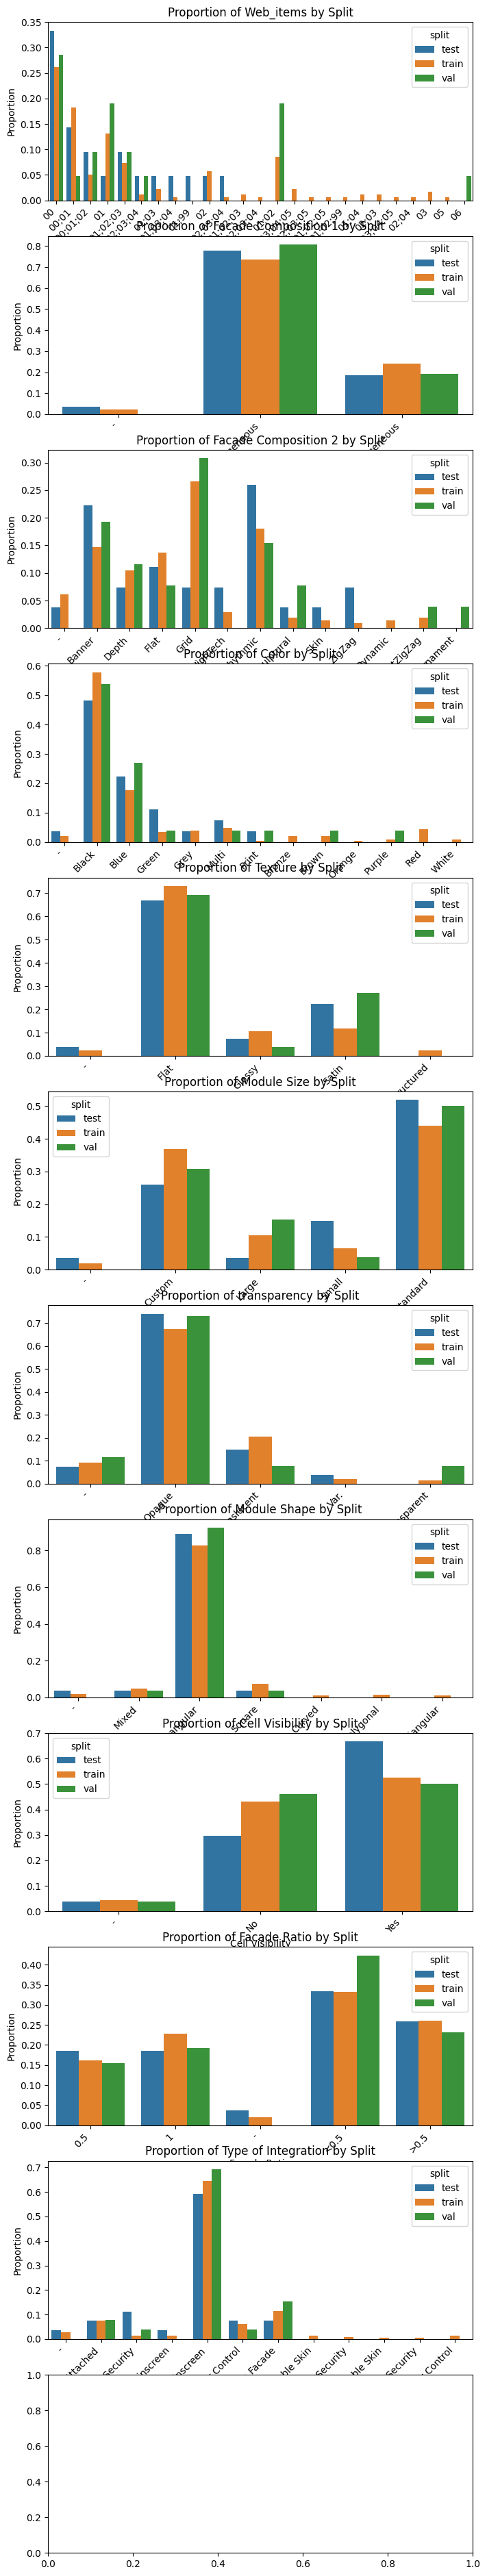

In [ ]:

# Categorical columns to visualize
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

fig, axes = plt.subplots(
    nrows=len(cat_cols),
    ncols=1,
    figsize=(8, 4 * len(cat_cols)),
    sharex=False,
    sharey=False
)

if len(cat_cols) == 1:
    axes = [axes]

for i, col in enumerate(cat_cols):
    ax = axes[i]

    # 1) Compute the raw counts per split + category
    group_counts = df.groupby(['split', col]).size().reset_index(name='count')

    # 2) Compute the total count per split
    split_totals = group_counts.groupby('split')['count'].sum().reset_index(name='split_total')

    # 3) Merge totals back so we can compute "proportion"
    group_counts = group_counts.merge(split_totals, on='split', how='left')
    group_counts['proportion'] = group_counts['count'] / group_counts['split_total']

    # 4) Plot using seaborn barplot for proportion
    sns.barplot(
        data=group_counts,
        x=col,
        y='proportion',
        hue='split',
        ax=ax
    )

    ax.set_title(f"Proportion of {col} by Split")
    ax.set_xlabel(col)
    ax.set_ylabel("Proportion")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


/tmp/ipython-input-82-1369618417.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
/tmp/ipython-input-82-1369618417.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=14)


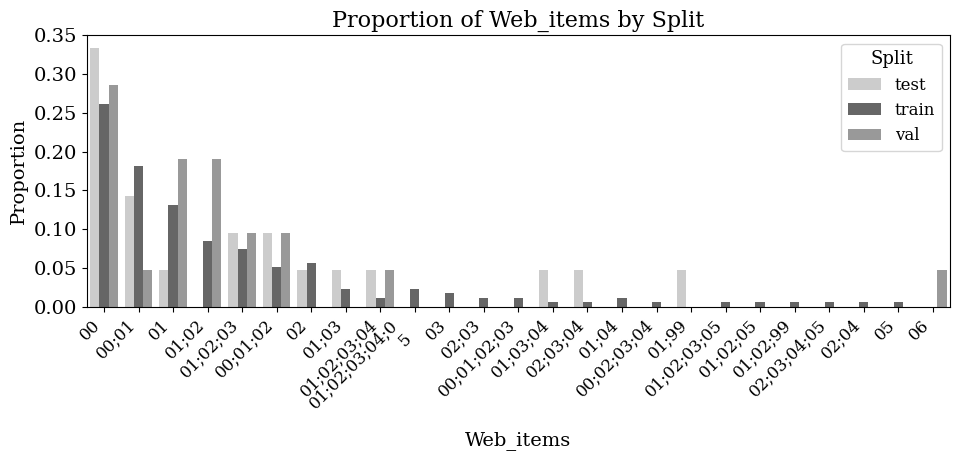

/tmp/ipython-input-82-1369618417.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
/tmp/ipython-input-82-1369618417.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=14)


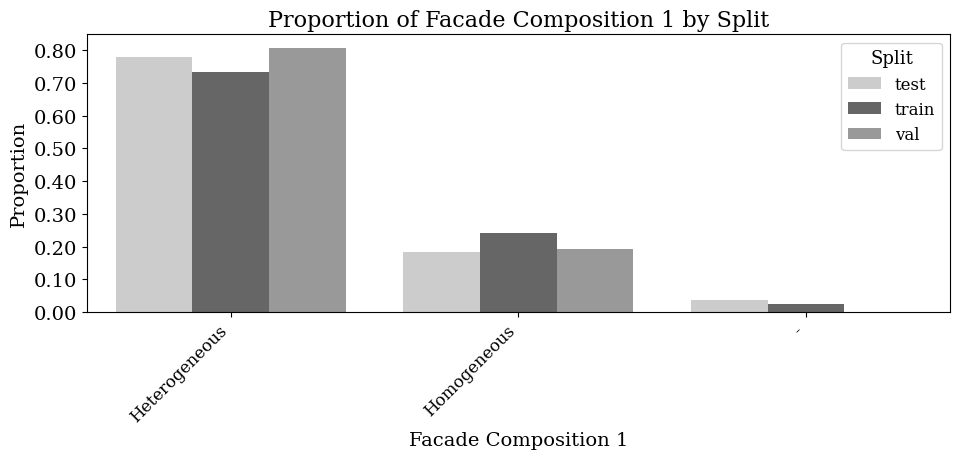

/tmp/ipython-input-82-1369618417.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
/tmp/ipython-input-82-1369618417.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=14)


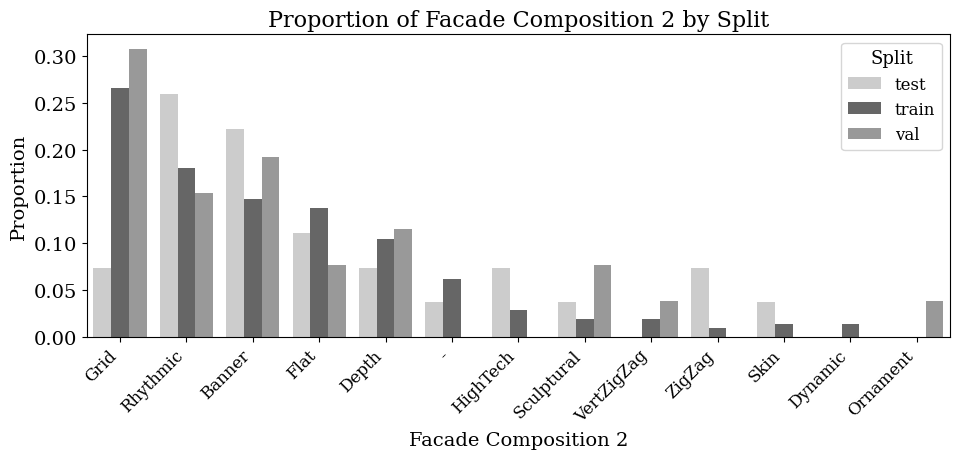

/tmp/ipython-input-82-1369618417.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
/tmp/ipython-input-82-1369618417.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=14)


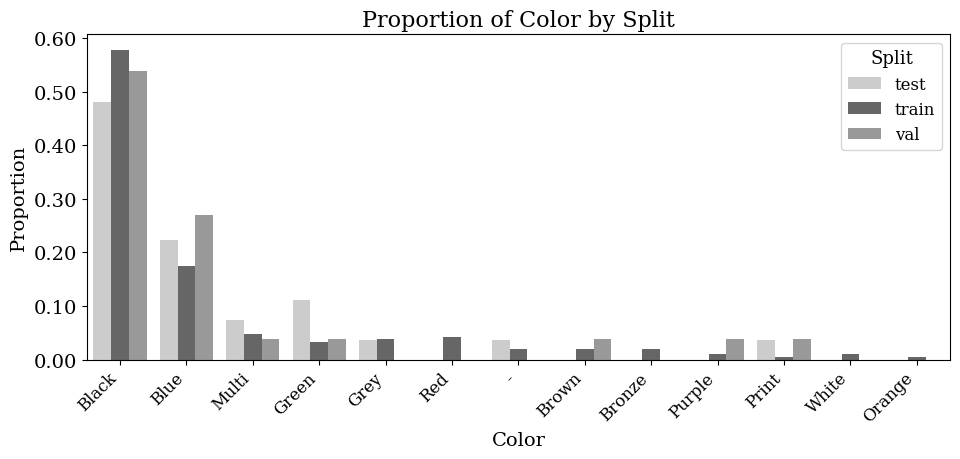

/tmp/ipython-input-82-1369618417.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
/tmp/ipython-input-82-1369618417.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=14)


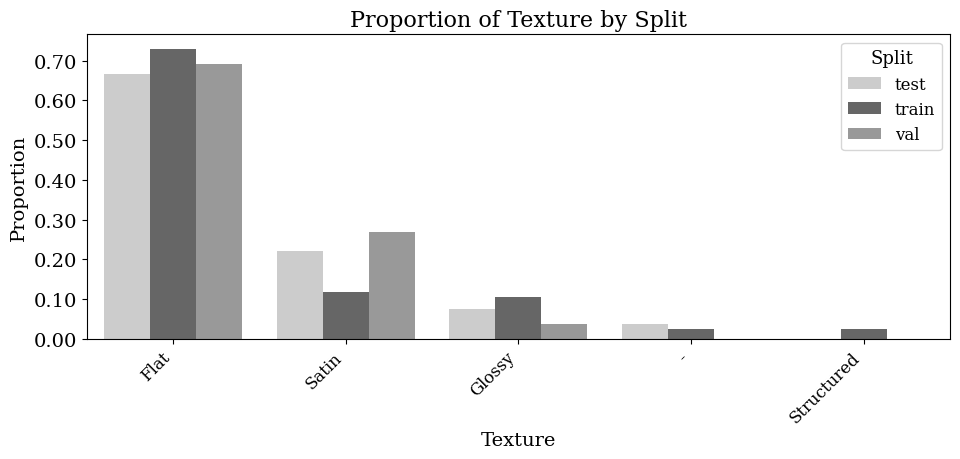

/tmp/ipython-input-82-1369618417.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
/tmp/ipython-input-82-1369618417.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=14)


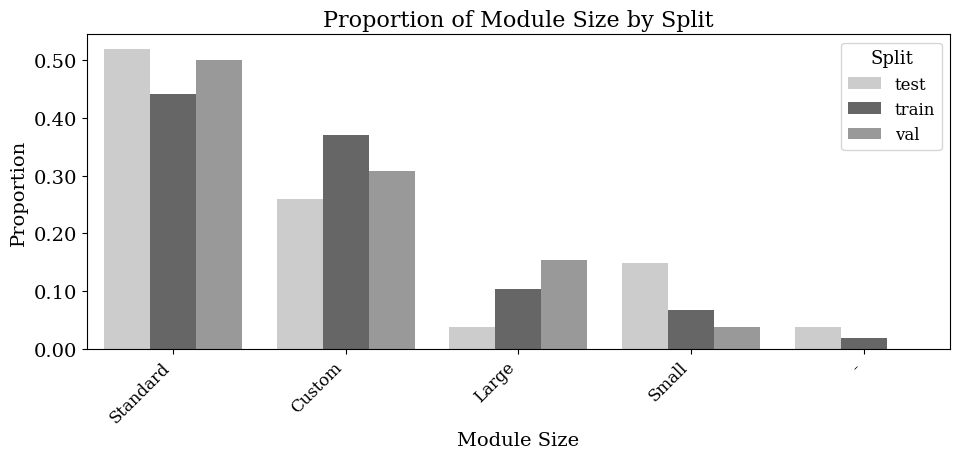

/tmp/ipython-input-82-1369618417.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
/tmp/ipython-input-82-1369618417.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=14)


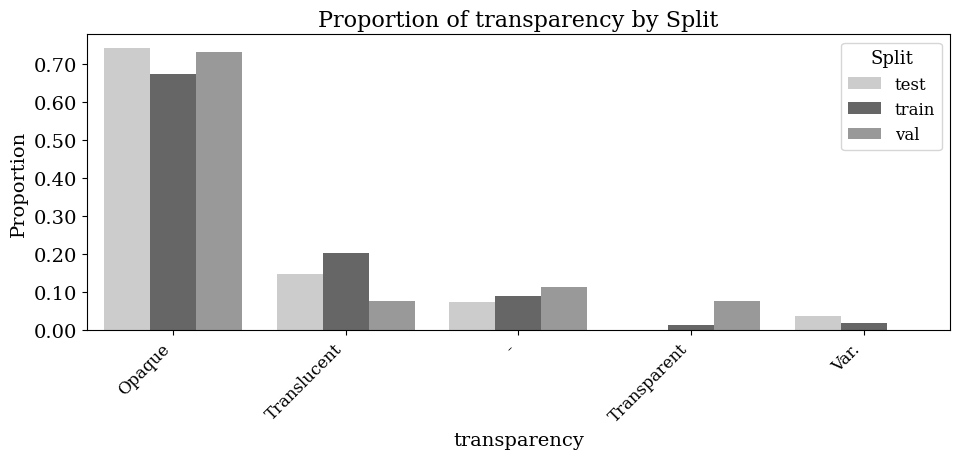

/tmp/ipython-input-82-1369618417.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
/tmp/ipython-input-82-1369618417.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=14)


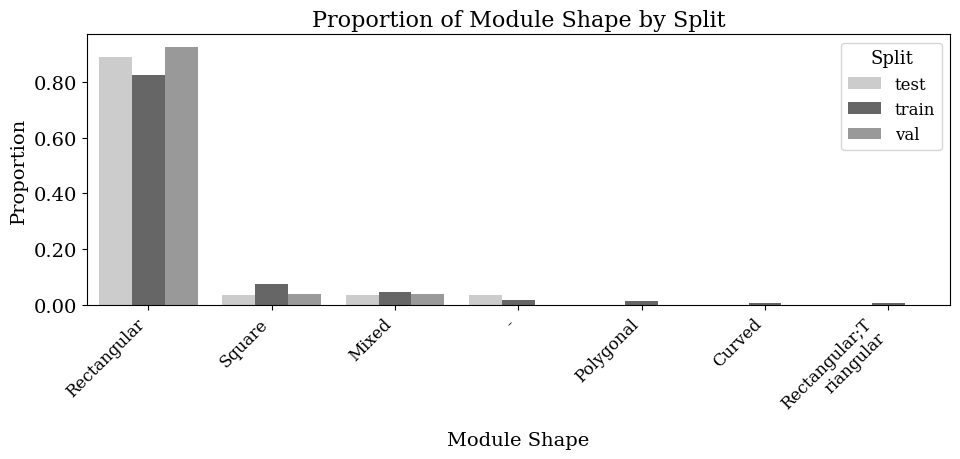

/tmp/ipython-input-82-1369618417.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
/tmp/ipython-input-82-1369618417.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=14)


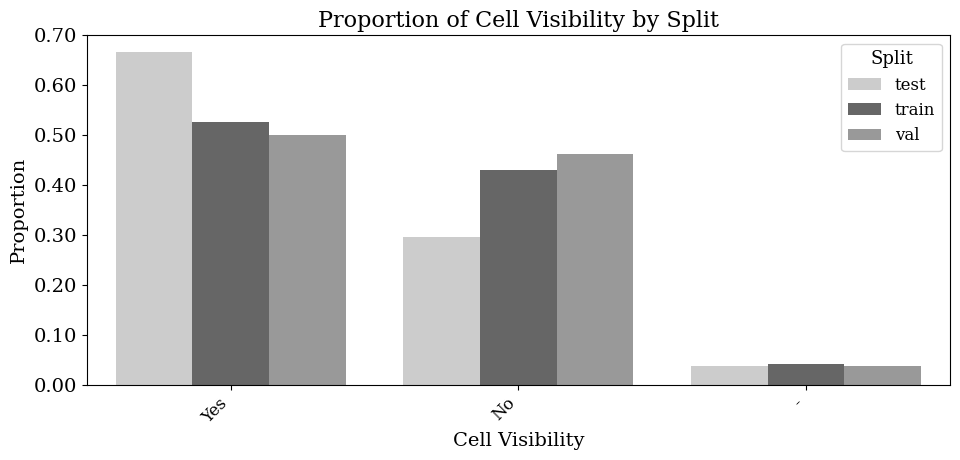

/tmp/ipython-input-82-1369618417.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
/tmp/ipython-input-82-1369618417.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=14)


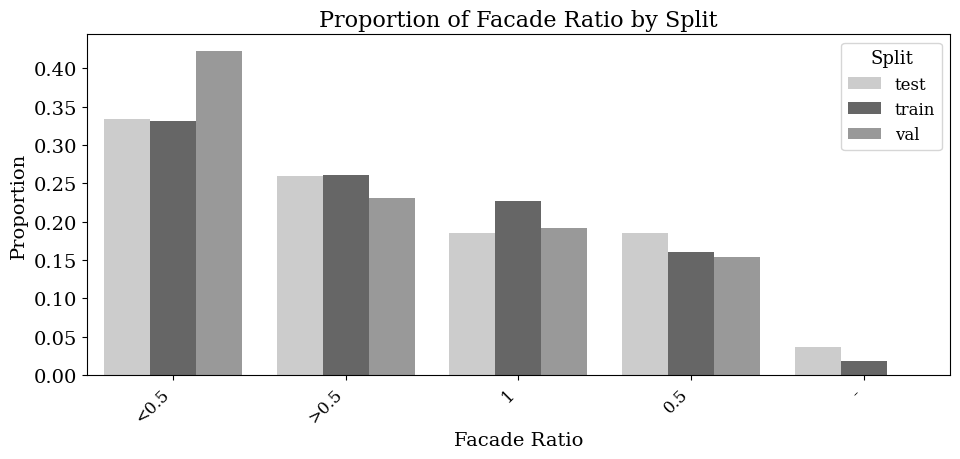

/tmp/ipython-input-82-1369618417.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
/tmp/ipython-input-82-1369618417.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=14)


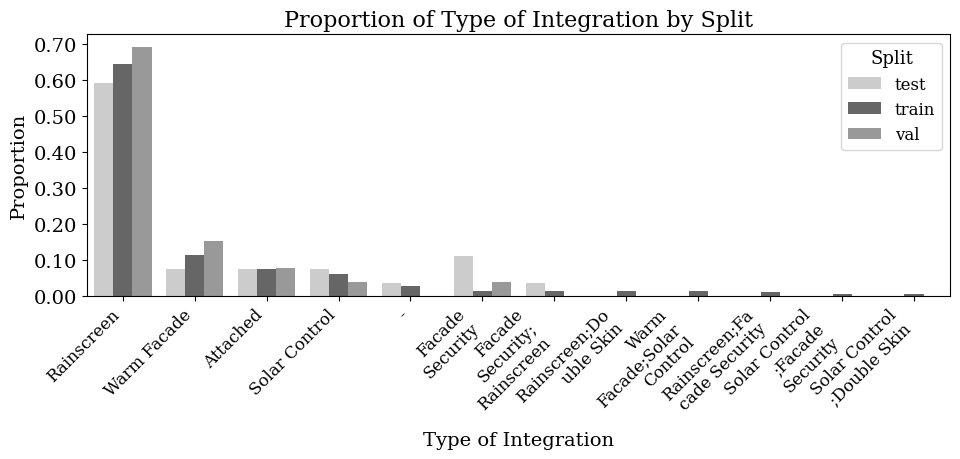

ValueError: cannot insert split, already exists

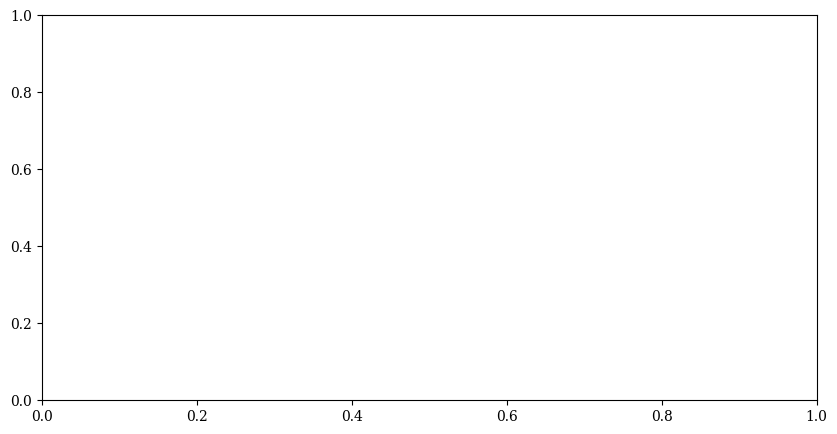

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm
import textwrap
import matplotlib.ticker as mtick

# Try to find Times New Roman, fallback if not found
font_candidates = [f.fname for f in fm.fontManager.ttflist if 'Times New Roman' in f.name]
if font_candidates:
    times_font = fm.FontProperties(fname=font_candidates[0])
    plt.rcParams['font.family'] = times_font.get_name()
else:
    times_font = None  # use default font

plt.rcParams.update({
    'font.size': 20,           # base font size
})

plt.rcParams['font.family'] = 'DejaVu Serif'


# Define a monochrome palette
split_palette = {
    'train': '#666666',  # dark gray
    'val': '#999999',    # medium gray
    'test': '#cccccc'    # light gray
}

# Categorical columns to visualize
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Loop through each column and generate a separate plot
for col in cat_cols:
    fig, ax = plt.subplots(figsize=(10, 5))

    # Compute counts and proportions
    group_counts = df.groupby(['split', col]).size().reset_index(name='count')
    split_totals = group_counts.groupby('split')['count'].sum().reset_index(name='split_total')
    group_counts = group_counts.merge(split_totals, on='split')
    group_counts['proportion'] = group_counts['count'] / group_counts['split_total']

    # Sort categories by overall frequency
    total_counts = group_counts.groupby(col)['count'].sum().sort_values(ascending=False).index
    group_counts[col] = pd.Categorical(group_counts[col], categories=total_counts, ordered=True)

    # Optional: Wrap long x-axis labels
    group_counts[col] = group_counts[col].apply(lambda x: '\n'.join(textwrap.wrap(str(x), width=13)))

    sns.barplot(
        data=group_counts,
        x=col,
        y='proportion',
        hue='split',
        palette=split_palette,
        ax=ax
    )

    if times_font:
        ax.set_title(f"Proportion of {col} by Split", fontproperties=times_font, fontsize=16)
        ax.set_xlabel(col, fontproperties=times_font, fontsize=14)
        ax.set_ylabel("Proportion", fontproperties=times_font, fontsize=14)
    else:
        ax.set_title(f"Proportion of {col} by Split", fontsize=16)
        ax.set_xlabel(col, fontsize=14)
        ax.set_ylabel("Proportion", fontsize=14)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
    ax.set_yticklabels(ax.get_yticks(), fontsize=14)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    ax.legend(title="Split", loc='upper right', fontsize=12, title_fontsize=13)




    plt.tight_layout()

    # Optional: Save to file
    # filename = f"proportion_{col.replace(' ', '_')}.png"
    # plt.savefig(filename, dpi=300, bbox_inches='tight')

    plt.show()


<ipython-input-85-391007148515>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
<ipython-input-85-391007148515>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
<ipython-input-85-391007148515>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
<ipython-input-85-391007148515>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
<ipython-input-85-391007148515>:24: UserWarning: set_ticklabels() should

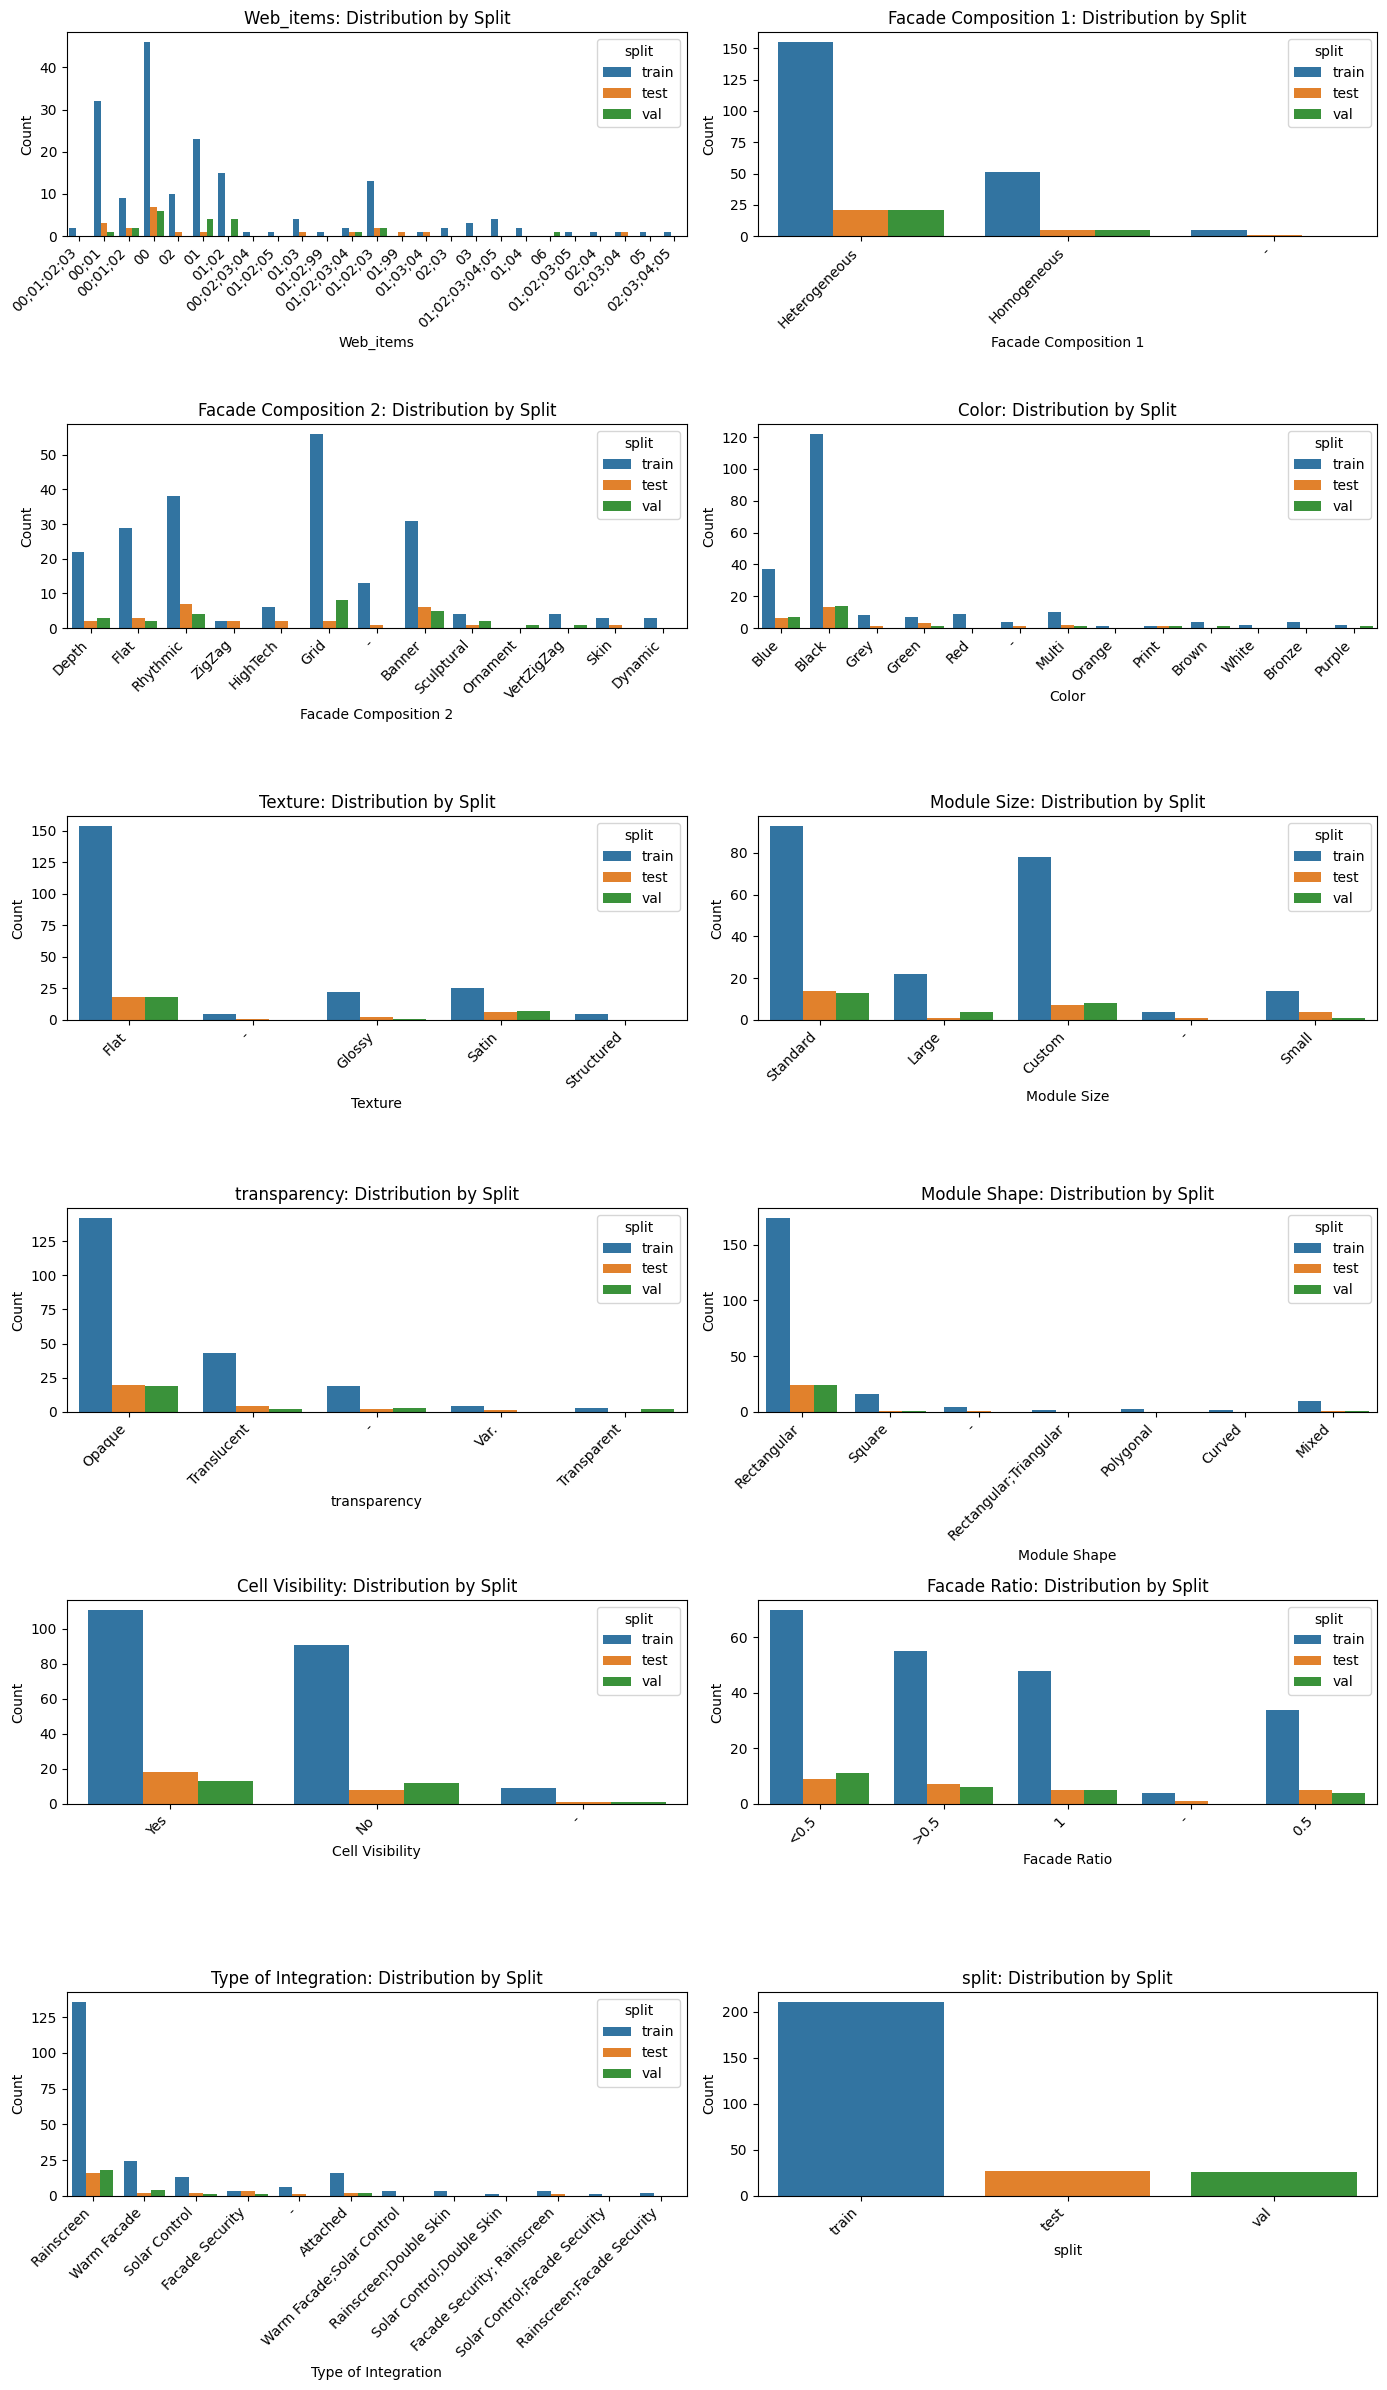

In [ ]:
# Categorical columns of interest
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Create a grid of subplots
num_cols = 2
num_rows = (len(cat_cols) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 4 * num_rows),
                         sharey=False)

# If there's only 1 row/col, make 'axes' a list so indexing doesn't break
axes = axes.flatten() if isinstance(axes, (list, np.ndarray)) else [axes]

for i, col in enumerate(cat_cols):
    ax = axes[i]

    # Countplot: x = category, hue = split
    sns.countplot(x=col, hue='split', data=df, ax=ax)

    # Make it look nicer
    ax.set_title(f"{col}: Distribution by Split")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Hide any unused subplots if cat_cols < num_rows*num_cols
for j in range(i+1, num_rows*num_cols):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


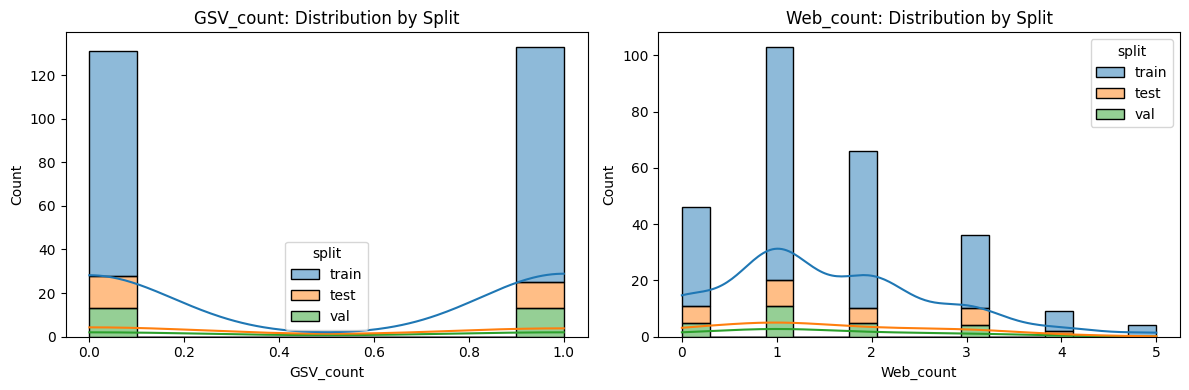

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ["GSV_count", "Web_count"]  # numeric features to plot

fig, axes = plt.subplots(1, len(num_cols), figsize=(6 * len(num_cols), 4))

# If there's only 1 numeric column, ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]

for i, col in enumerate(num_cols):
    ax = axes[i]

    # histplot: x = numeric column, hue = split
    sns.histplot(data=df, x=col, hue="split", kde=True, multiple="stack", ax=ax)

    ax.set_title(f"{col}: Distribution by Split")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


In [ ]:
df[["split", "project index", "total_count", "GSV_count", "GSV_items", "Web_items", "Web_count"]].to_excel('split_counts.xlsx', index=False)

In [ ]:
df['split'].value_counts()


,count
split,
train,211
test,27
val,26


In [ ]:
# Summation of total_count across projects for each split
df.groupby('split')['total_count'].sum()

,total_count
split,
test,53
train,429
val,50


In [ ]:
df

,project index,total_count,GSV_count,GSV_items,Web_count,Web_items,Facade Composition 1,Facade Composition 2,Color,Texture,Module Size,transparency,Module Shape,Cell Visibility,Facade Ratio,Type of Integration,split
0,2,1,1,0.0,0,NaN,Heterogeneous,Depth,Blue,Flat,Standard,Opaque,Rectangular,Yes,<0.5,Rainscreen,train
1,3,4,0,NaN,4,00;01;02;03,Homogeneous,Flat,Black,Flat,Large,Translucent,Rectangular,Yes,>0.5,Warm Facade,train
2,4,2,0,NaN,2,00;01,Homogeneous,Flat,Blue,Flat,Large,Opaque,Rectangular,Yes,<0.5,Rainscreen,train
3,5,1,1,0.0,0,NaN,Heterogeneous,Rhythmic,Blue,Flat,Large,Opaque,Rectangular,No,<0.5,Solar Control,train
4,6,4,1,0.0,3,00;01;02,Heterogeneous,Flat,Grey,Flat,Standard,Translucent,Rectangular,Yes,<0.5,Facade Security,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,399,2,0,NaN,2,01;02,-,-,Black,Flat,Custom,Translucent,Rectangular,Yes,<0.5,Solar Control,train
260,400,3,0,NaN,3,01;02;03,Heterogeneous,Flat,Black,Flat,Small,Opaque,Rectangular,Yes,1,Rainscreen,train
261,401,5,1,0.0,4,02;03;04;05,Heterogeneous,Rhythmic,Green,Flat,Large,Opaque,Rectangular,Yes,<0.5,Rainscreen,train
262,402,4,1,0.0,3,01;02;03,Homogeneous,Grid,Multi,Flat,Standard,Opaque,Rectangular,Yes,1,Rainscreen,train


## Random

In [ ]:

def random_group_split(project_group, test_size=0.2, val_size=0.2, seed=42):
    # Shuffle the project indices
    proj_indices = project_group['project index'].unique()
    rng = np.random.default_rng(seed)
    rng.shuffle(proj_indices)

    n_total = len(proj_indices)
    n_test  = int(np.floor(n_total * test_size))
    n_val   = int(np.floor(n_total * val_size))
    n_train = n_total - n_test - n_val

    test_projects  = proj_indices[:n_test]
    val_projects   = proj_indices[n_test:n_test + n_val]
    train_projects = proj_indices[n_test + n_val:]

    # Mark splits
    project_group_random = project_group.copy()
    project_group_random['split'] = None

    project_group_random.loc[
        project_group_random['project index'].isin(train_projects), 'split'
    ] = 'train'
    project_group_random.loc[
        project_group_random['project index'].isin(val_projects), 'split'
    ] = 'val'
    project_group_random.loc[
        project_group_random['project index'].isin(test_projects), 'split'
    ] = 'test'

    return project_group_random


project_group_random = random_group_split(project_group, test_size=0.2, val_size=0.2, seed=999)


In [ ]:

df_random = df.merge(
    project_group_random[['project index', 'split']],
    on='project index', how='left'
)


In [ ]:
df_random

,project index,total_count,GSV_count,GSV_items,Web_count,Web_items,Facade Composition 1,Facade Composition 2,Color,Texture,Module Size,transparency,Module Shape,Cell Visibility,Facade Ratio,Type of Integration,split_x,split_y
0,2,1,1,[0],0,[],Heterogeneous,Depth,Blue,Flat,Standard,Opaque,Rectangular,Yes,<0.5,Rainscreen,train,train
1,3,4,0,[],4,"[0, 1, 2, 3]",Homogeneous,Flat,Black,Flat,Large,Translucent,Rectangular,Yes,>0.5,Warm Facade,test,val
2,4,2,0,[],2,"[0, 1]",Homogeneous,Flat,Blue,Flat,Large,Opaque,Rectangular,Yes,<0.5,Rainscreen,train,train
3,5,1,1,[0],0,[],Heterogeneous,Rhythmic,Blue,Flat,Large,Opaque,Rectangular,No,<0.5,Solar Control,train,train
4,6,4,1,[0],3,"[0, 1, 2]",Heterogeneous,Flat,Grey,Flat,Standard,Translucent,Rectangular,Yes,<0.5,Facade Security,train,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,398,3,1,[0],2,"[1, 3]",-,-,Black,Flat,Custom,Translucent,Rectangular,Yes,<0.5,Solar Control,train,test
257,399,2,0,[],2,"[1, 2]",Heterogeneous,Flat,Black,Flat,Small,Opaque,Rectangular,Yes,1,Rainscreen,train,test
258,400,3,0,[],3,"[1, 2, 3]",Heterogeneous,Rhythmic,Green,Flat,Large,Opaque,Rectangular,Yes,<0.5,Rainscreen,train,test
259,401,5,1,[0],4,"[2, 3, 4, 5]",Homogeneous,Grid,Multi,Flat,Standard,Opaque,Rectangular,Yes,1,Rainscreen,test,train


In [ ]:
# For the stratified approach:
df_strat_train = df[df['split'] == 'train']
df_strat_val   = df[df['split'] == 'val']
df_strat_test  = df[df['split'] == 'test']

# For the random approach:
df_rand_train = df_random[df_random['split_y'] == 'train']
df_rand_val   = df_random[df_random['split_y'] == 'val']
df_rand_test  = df_random[df_random['split_y'] == 'test']

# Then plot or tabulate distributions, e.g.:
print("Stratified approach, Façade Composition distribution in TRAIN:")
print(df_strat_train['Facade Composition 1'].value_counts(normalize=True))

print("Random approach, Façade Composition distribution in TRAIN:")
print(df_rand_train['Facade Composition 1'].value_counts(normalize=True))


Stratified approach, Façade Composition distribution in TRAIN:
Facade Composition 1
Heterogeneous    0.771084
Homogeneous      0.222892
-                0.006024
Name: proportion, dtype: float64
Random approach, Façade Composition distribution in TRAIN:
Facade Composition 1
Heterogeneous    0.751592
Homogeneous      0.248408
Name: proportion, dtype: float64
